In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import catboost

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('class', axis = 1)

In [7]:
y = df['class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
from catboost import CatBoostClassifier, Pool

In [10]:
model = CatBoostClassifier()

In [11]:
cat_features = np.linspace(0, 21, 22, dtype=int)

In [12]:
model.fit(X_train, y_train, cat_features=cat_features)

Learning rate set to 0.02291
0:	learn: 0.6376390	total: 165ms	remaining: 2m 44s
1:	learn: 0.5869951	total: 176ms	remaining: 1m 27s
2:	learn: 0.5325482	total: 196ms	remaining: 1m 5s
3:	learn: 0.4881763	total: 207ms	remaining: 51.6s
4:	learn: 0.4448337	total: 230ms	remaining: 45.8s
5:	learn: 0.4016100	total: 255ms	remaining: 42.3s
6:	learn: 0.3696354	total: 267ms	remaining: 37.9s
7:	learn: 0.3419491	total: 281ms	remaining: 34.8s
8:	learn: 0.3088822	total: 302ms	remaining: 33.2s
9:	learn: 0.2849736	total: 321ms	remaining: 31.7s
10:	learn: 0.2643334	total: 341ms	remaining: 30.6s
11:	learn: 0.2455724	total: 355ms	remaining: 29.2s
12:	learn: 0.2287803	total: 373ms	remaining: 28.3s
13:	learn: 0.2134123	total: 397ms	remaining: 27.9s
14:	learn: 0.1955861	total: 426ms	remaining: 28s
15:	learn: 0.1835225	total: 444ms	remaining: 27.3s
16:	learn: 0.1721868	total: 466ms	remaining: 26.9s
17:	learn: 0.1546416	total: 493ms	remaining: 26.9s
18:	learn: 0.1388915	total: 521ms	remaining: 26.9s
19:	learn: 0

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [16]:
model.feature_importances_

array([1.01414475e-01, 2.87095340e-01, 1.17639791e-01, 3.67235413e-01,
       7.57922299e+01, 7.46709586e-02, 1.11317741e+00, 2.70295007e+00,
       0.00000000e+00, 1.81076558e+00, 3.78387274e-01, 3.70825440e+00,
       1.12404153e+00, 9.81652876e-03, 6.38523879e-02, 0.00000000e+00,
       4.41695718e-01, 2.45808509e+00, 6.40678039e-01, 6.94012377e+00,
       1.73983971e+00, 1.28046638e-01])

In [17]:
feat_imp = pd.DataFrame(data=model.feature_importances_, index=X.columns)

In [18]:
feat_imp.sort_values(0, ascending=False)

,0
odor,75.792230
spore-print-color,6.940124
stalk-surface-above-ring,3.708254
gill-size,2.702950
ring-number,2.458085
stalk-shape,1.810766
population,1.739840
stalk-surface-below-ring,1.124042
gill-spacing,1.113177
ring-type,0.640678


In [21]:
data = Pool(X, y, cat_features=cat_features)

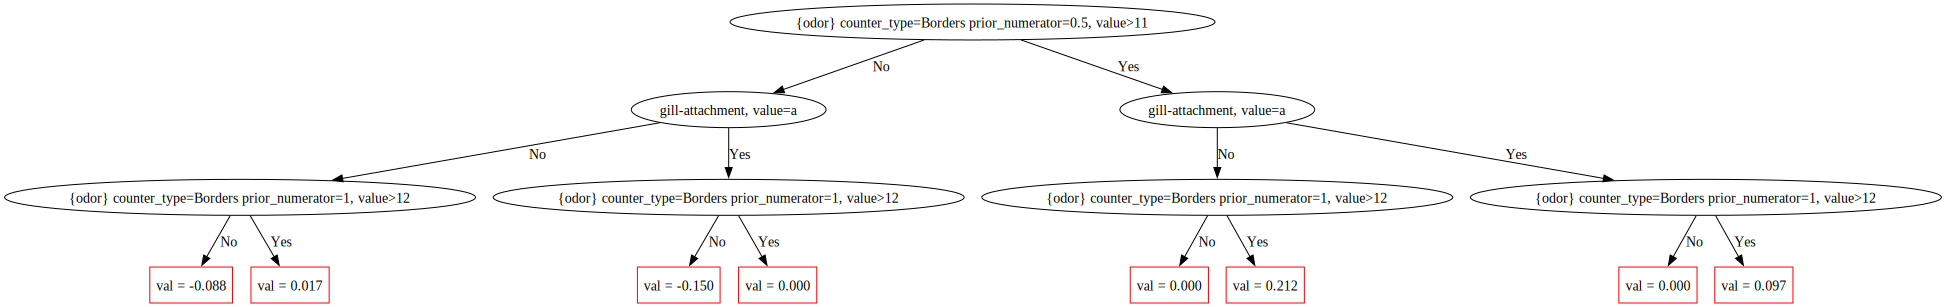

In [27]:
model.plot_tree(tree_idx=0, pool = data)